## Lab 2: Monte Carlo Self-Avoiding Walks ##



In [2]:
# Imports
import numpy as np
import scipy.stats as sci
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Question 1: #

A. Ideal polymer.
1. Implement a growing algorithm of an ideal polymer as a random walk process on (i) a square lattice (2D); (ii) a cubic lattice (3D). 
You can assume, without loss of generality, that the first monomer is at (0, 0, 0) and the second is at (1, 0, 0).

1.1 Calculate the dependence of RP2 and Rg2 on the number of monomers for N < Nmax = 100. Plot your results.

1.2 Extract the exponent ν defined in Eq. 3.
Do your calculations considering a number of at least M = 1000 independent realizations of
your polymers.

In [68]:
## Functions ##

# Next Step (currently not avoiding chain, only step)
def move(d, input, avoid):
    moves=[0,1,2,3]
    if d==3:
        moves=[0,1,2,3,4,5]
    if avoid==True:
        moves.remove((input-d)%(2*d))
    return np.random.choice(moves), moves

# Naive and Center of Mass Radii Avg
def radii(polymer, d):
    # Chain of monomers size N
    if d==2:
        # naive "radius"
        radius = np.sqrt((polymer[-1,0]-polymer[0,0])**2 + (polymer[-1,1]-polymer[0,1])**2)
        #radius = np.sqrt(np.mean((polymer[-1,0])**2 + (polymer[-1,1])**2))

        # center of mass
        cm = [np.mean(polymer[:,0]),np.mean(polymer[:,1])]

        # difference mask of monomer vs center of mass
        r_cm = np.sqrt( np.sum((( polymer[:,0]-cm[0] )**2 + ( polymer[:,1]-cm[1] )**2))/len(polymer))
        #r_cm=np.sqrt(np.mean((polymer[:,0]-cm[0])**2 + (polymer[:,1]-cm[1])**2))
    if d==3:
        # naive "radius"
        radius = np.sqrt((polymer[-1,0]-polymer[0,0])**2 + (polymer[-1,1]-polymer[0,1])**2 + (polymer[-1,2]-polymer[0,2])**2)

        # center of mass
        cm = [np.mean(polymer[:,0]),np.mean(polymer[:,1]), np.mean(polymer[:,2])]

        # difference mask of monomer vs center of mass
        r_cm=np.sqrt(np.mean((polymer[:,0]-cm[0])**2 + (polymer[:,1]-cm[1])**2 + (polymer[:,2]-cm[2])**2))    
    return radius, r_cm, cm

# For plotting, returns moves --> coordinates for chain
def translate_to_coord(p, w, d):
    if d==3:
        # Direction mapping: 0=(-x), 1=(+y), 2=(-z), 3=(+x), 4=(-y), 5=(+z),
        p_coordinates = [(0, 0, 0, 5)]
        moves = {
            0: (-1, 0, 0),  # -x
            1: (0, 1, 0),   # +y
            2: (0, 0, -1),   # -z
            3: (1, 0, 0),   # +x
            4: (0, -1, 0),   # -y
            5: (0, 0, 1),   # +z
        }
        for m in p:
            x, y, z, _w = p_coordinates[-1]          # last position
            dx, dy, dz = moves[m]          # direction delta
            _w = w[m]
            p_coordinates.append((x + dx, y + dy, z + dz, _w))
    elif d==2:
        # Direction mapping: 0=left, 1=up, 2=right, 3=down
        p_coordinates = [(0, 0, 3)]
        moves = {
            0: (-1, 0),  # -x
            1: (0, 1),   # +y
            2: (1, 0),   # +x
            3: (0, -1)   # -y
        }
        for _,m in enumerate(p):
            x, y, _w = p_coordinates[-1]          # last position
            dx, dy = moves[m]          # direction delta
            #print(f"{len(p)}[{m}]->{w}")
            _w = w[_]
            p_coordinates.append((x + dx, y + dy, _w))
    return np.array(p_coordinates)

In [4]:
def polymerWalkMultipleLengths(length, n_polymers, d):
    polymers=[]
    dist=[]
    r2p=[] # naive rad
    r2g=[] # rad gyr
    cm=[] # center of masses
    for num in range(n_polymers):
        if d==2:
            p=[2] #(0,0)->(1,0) initial move
            w=[3] # options at pos
        elif d==3:
            p=[3] #(0,0,0)->(1,0,0) initial move
            w=[5] # options at pos
        for m in range(length-1):
            step, weight = move(d,p[-1], True) # move 1 excluding last dir
            p.append(step)
            dist.append(step)
            w.append(len(weight))
        plot_p = translate_to_coord(p,w,d)
        polymers.append(plot_p)
        _r2p, _r2g, _cm = radii(polymers[num], d)
        r2p.append(_r2p)
        r2g.append(_r2g)
        cm.append(_cm)
    
    return polymers, r2p, r2g, cm


In [ ]:
all_polymers=[]
r2p=[] # naive rad
r2g=[] # rad gyr
cm=[] # center of masses
ns = np.arange(3,101, dtype=int)

#ns = np.arange(499,501, dtype=int)
#ns=np.array([10,50,100,500,1000], dtype=int)
d=2
n_polymers=1000
for n in ns:
    _all_polymers, _r2p, _r2g, _cm = polymerWalkMultipleLengths(n, n_polymers, d)
    all_polymers.append(_all_polymers)
    r2p.append(_r2p)
    r2g.append(_r2g)
    cm.append(_cm)
fig, ax = plt.subplots(figsize=(10,7))
sqrt=np.float_power(ns, 0.75)
ax.loglog(ns, np.mean(r2p, axis=1), color="black", label="r2p")
ax.loglog(ns, np.mean(r2g, axis=1), color="black", label="r2g", linestyle="--")
ax.plot(ns, sqrt)
slope = (np.mean(r2p, axis=1)[-1]-np.mean(r2p, axis=1)[0]) / (ns[-1]-ns[0])
slope = (np.mean(r2g, axis=1)[-1]-np.mean(r2g, axis=1)[0]) / (ns[-1]-ns[0])

slope = (np.mean(np.log(r2g), axis=1)[-1]-np.mean(np.log(r2g), axis=1)[0]) / (np.log(ns[-1])-np.log(ns[0]))
ax.text(5,10,f"{slope:.3f}")

ax.legend()
plt.show()

In [79]:
n_monomers = 1000 # steps
n_polymers=100
polymers=[]
dist=[]
moves=[]
r2p=[] # naive rad
r2g=[] # rad gyr
cm=[] # center of masses



## Ideal Walk ##
d = 2
for num in range(n_polymers):
    if d==2:
        p=[2] #(0,0)->(1,0) initial move
        w=[3] # options at pos
    elif d==3:
        p=[3] #(0,0,0)->(1,0,0) initial move
        w=[5] # options at pos
    for m in range(n_monomers-1):
        step, weight = move(d,p[-1], True) # move 1 excluding last dir
        p.append(step)
        dist.append(step)
        w.append(len(weight))
    plot_p = translate_to_coord(p,w,d)
    polymers.append(plot_p)
    _r2p, _r2g, _cm = radii(polymers[num], d)
    r2p.append(_r2p)
    r2g.append(_r2g)
    cm.append(_cm)


In [ ]:
## Self-Avoiding Walk ##
d = 2
for num in range(n_polymers):
    if d==2:
        p=[2] #(0,0)->(1,0) initial move
        w=[3] # options at pos
    elif d==3:
        p=[3] #(0,0,0)->(1,0,0) initial move
        w=[5] # options at pos
    for m in range(n_monomers-1):
        
        #TODO
        #--TRY MOVE (while len < N_monomers)
        #----if empty: 
        #---- >: go backwards one monomer, remove self. 
        #----Check backwards (should be quicker, more likely to hit closer link) list of visited places, a list of (x,y) or (x,y,z) 
        #---- x: remove move from options, TRY MOVE from options 
        #--success
        #-- >: Add move to monomer list
        #-- >: Remove new position from previous move option list
        #-- >: Add move option positions to set(open_choices)
        #-- >: Add position to visited
        #-- >: If position in set(open_choices), pop position from open_choices -- different from monomer directly behind
        #-- >: Reset options minus last move
        #--fail
        #--?
    
        
        step, weight = move(d,p[-1], True) # move 1 excluding last dir
        p.append(step)
        dist.append(step)
        w.append(len(weight)) #### !!!!!! is this correct for later calcs?
    plot_p = translate_to_coord(p,w,d)
    polymers.append(plot_p)
    _r2p, _r2g, _cm = radii(polymers[num], d)
    r2p.append(_r2p)
    r2g.append(_r2g)
    cm.append(_cm)

Naive mean: 36.284
Rad.Gyr mean: 16.501


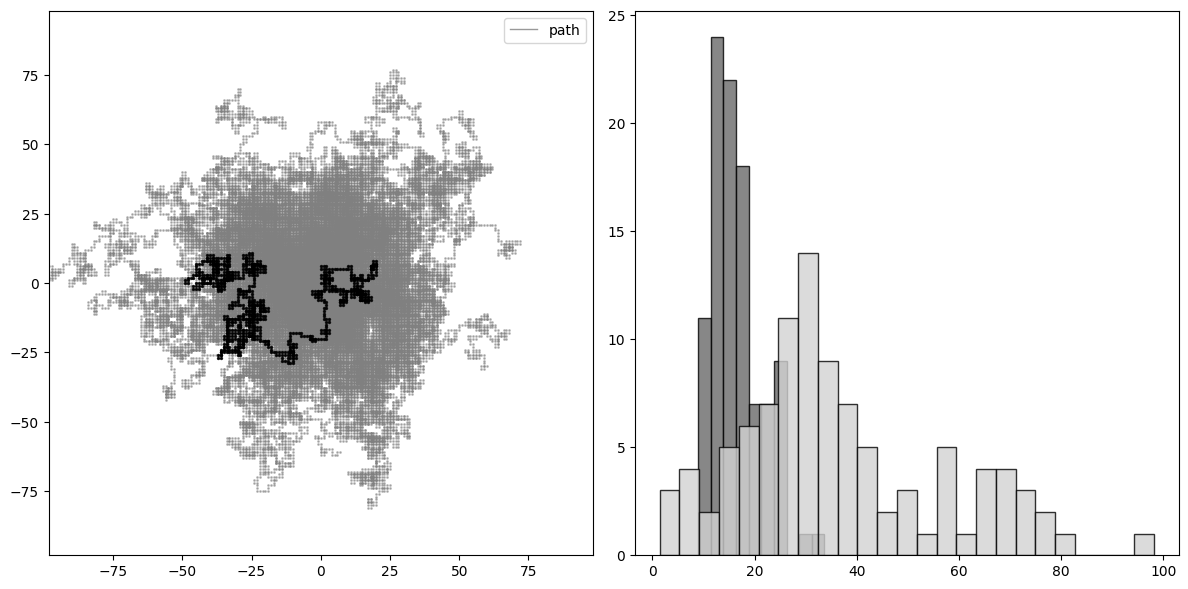

In [80]:
r2p=np.array(r2p)
r2g=np.array(r2g)

print(f"Naive mean: {np.mean(r2p):.3f}")
print(f"Rad.Gyr mean: {np.mean(r2g):.3f}")
if d==2:
    # Plot lattice walk
    fig, (ax, ax2) = plt.subplots(1,2, figsize=(12,6))
    n = np.arange(0,n_polymers)
    # Plot all walks
    for _, poly in enumerate(polymers):
        #ax.plot(poly[:,0],poly[:,1], linewidth=1, color='black', alpha=0.2)
        ax.scatter(poly[:,0], poly[:,1], color='gray', s=1, alpha=0.5)
        #ax.scatter(cm[_][0], cm[_][1], color='black', s=2, marker="x", alpha=1)
    ax2.hist(r2g, alpha=0.8, facecolor="dimgray", edgecolor="black", label="Rad. Gyr")
    ax2.hist(r2p, alpha=0.8, bins=25, facecolor="lightgray", edgecolor="black", label="Polymer Size")

    # Plot last walk + legend
    ax.plot(plot_p[:,0], plot_p[:,1], linewidth=1, color='black', alpha=0.4,label="path")
    ax.scatter(plot_p[:,0], plot_p[:,1], color='black', s=2, alpha=0.8)

    # sqrt(n) box
    r = plt.Rectangle([-10,-10], 20, 20, edgecolor="black", fill=False, label="sqrt(n)")
    #ax.add_patch(r)
    lims=np.max(r2p)
    ax.set_xlim(-lims,lims)
    ax.set_ylim(-lims,lims)
    ax.legend()

    plt.grid(which="minor",alpha=0.2)
    plt.tight_layout()
    plt.show()

    
elif d==3:
    # Plot lattice walk 3D case
    fig= plt.figure(figsize=(12,6))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)
    n = np.arange(0,n_polymers)
    # Plot all walks
    for _, poly in enumerate(polymers):
        ax.plot3D(poly[:,0], poly[:,1], poly[:,2], linewidth=1, color='black', alpha=0.05)
        #ax.scatter(poly[:,0], poly[:,1], poly[:,2], color='gray', s=1, alpha=0.1)
        #ax.scatter(cm[_][0], cm[_][1], cm[_][2], color='black', s=2, marker="x", alpha=1)
    ax2.hist(r2g, alpha=0.8, bins=25,facecolor="dimgray", edgecolor="black", label="Rad. Gyr")
    ax2.hist(r2p, alpha=0.8, bins=25, facecolor="lightgray", edgecolor="black", label="Polymer Size")

    # Plot last walk + legend
    ax.plot3D(plot_p[:,0], plot_p[:,1], plot_p[:,2], linewidth=1, color='black', alpha=0.4,label="path")
    ax.scatter(plot_p[:,0], plot_p[:,1], color='black', s=1, alpha=0.8)
    lims=np.max([np.max(np.abs(plot_p[:,0])), np.max(np.abs(plot_p[:,1])), np.max(np.abs(plot_p[:,2]))])
    ax.set_xlim(-lims,lims)
    ax.set_ylim(-lims,lims)
    ax.set_zlim(-lims,lims)
    ax.legend()

    plt.grid(which="minor",alpha=0.2)
    plt.tight_layout()
    plt.show()

## Dependence of r2p and r2g on N ##

- for n:[2:100]
- - create polymers
- - calculate r2p,r2g
- - return (n, r2p, r2g)
- plot (x:n, y:r2p and r2g curves)


## Self Avoiding Walk ##

def saw_polymer
while possible_steps not empty:
    if n==0: return
    else:
        select.random(possible_steps)
        if new_pos not in prev_pos_list:
            prev_pos_list.push(new_pos)
            n+=1
        
        


